In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

1. Generando los valores de X e y

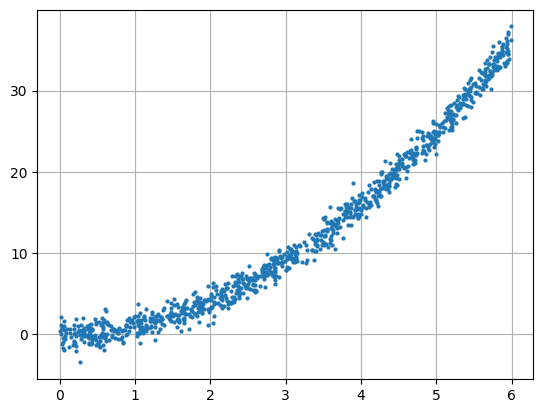

In [2]:
m = 1000
X = 6 * np.random.rand(m,1)
y = X**2 + np.random.randn(m,1)

plt.plot(X, y, 'o', markersize=2)
plt.grid()
plt.show()

2. Diviendo el set de datos en Train y test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

3. Agregando las características polinómicas

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poli = PolynomialFeatures(degree=2)
poli.fit(X=X_train.reshape(-1,1))

X_train_pol = poli.transform(X=X_train.reshape(-1,1))
X_test_pol = poli.transform(X=X_test.reshape(-1,1))

print(X_train_pol.shape)
print(X_test_pol.shape)

(700, 3)
(300, 3)


4. Creando el modelo

In [5]:
entrada = keras.layers.Input(shape=(3,), name='capa_de_entrada')
capa_oculta_1 = keras.layers.Dense(200, activation='relu', name='capa_oculta_1')(entrada)
capa_oculta_2 = keras.layers.Dense(200, activation='relu', name='capa_oculta_2')(capa_oculta_1)
capa_oculta_3 = keras.layers.Dense(200, activation='relu', name='capa_oculta_3')(capa_oculta_2)
capa_oculta_4 = keras.layers.Dense(200, activation='relu', name='capa_oculta_4')(capa_oculta_3)
salida = keras.layers.Dense(1, name='capa_de_salida')(capa_oculta_4)

modelo = keras.Model(inputs=[entrada], outputs=[salida])

5. Compilación del modelo

In [6]:
modelo.compile(
    loss = 'mean_absolute_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
)

6. Entrenando el modelo

In [7]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='modelos_guardados/modelo_polinomio_con_ruido.h5',
    monitor='val_loss',
    verbose=-1,
    save_best_only=True,
    mode='min'
)

In [8]:
history = modelo.fit(X_train_pol, y_train, epochs=500, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/500
18/18 [==============================] - 1s 27ms/step - loss: 12.1000 - val_loss: 10.9309
Epoch 2/500
18/18 [==============================] - 0s 12ms/step - loss: 10.3247 - val_loss: 8.7937
Epoch 3/500
18/18 [==============================] - 0s 13ms/step - loss: 7.5748 - val_loss: 5.2981
Epoch 4/500
18/18 [==============================] - 0s 13ms/step - loss: 3.1968 - val_loss: 0.9839
Epoch 5/500
18/18 [==============================] - 0s 13ms/step - loss: 1.1418 - val_loss: 0.8857
Epoch 6/500
18/18 [==============================] - 0s 14ms/step - loss: 0.9308 - val_loss: 0.7393
Epoch 7/500
18/18 [==============================] - 0s 12ms/step - loss: 0.8636 - val_loss: 0.7194
Epoch 8/500
18/18 [==============================] - 0s 13ms/step - loss: 0.8812 - val_loss: 0.7064
Epoch 9/500
18/18 [==============================] - 0s 9ms/step - loss: 0.8368 - val_loss: 0.7206
Epoch 10/500
18/18 [==============================] - 0s 12ms/step - loss: 0.8419 - val_loss: 0.78

7. Se carga el mejor modelo entrenado

In [9]:
modelo = keras.models.load_model('modelos_guardados/modelo_polinomio_con_ruido.h5')

8. Evaluación del modelo

In [10]:
modelo.evaluate(X_test_pol, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.7695


0.7695480585098267

9. Realizando predicciones

10/10 [==============================] - 0s 2ms/step


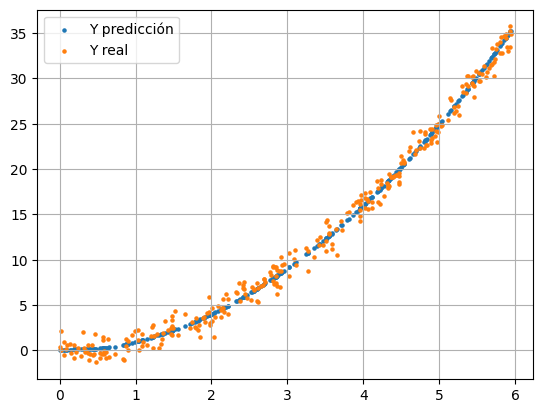

In [11]:
y_pred = modelo.predict(X_test_pol)

plt.scatter(X_test, y_pred, s=5, label='Y predicción')
plt.scatter(X_test, y_test, s=5, label = 'Y real')
plt.legend()
plt.grid()
plt.show()

10. Cálculando el coeficiente de determinación

In [12]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.9927264852635973